In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### load data

In [ ]:
df=pd.read_csv('adiddass_uk.csv')
df

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,year
0,0,Foot Locker,1185732,1/1/2020,Northeast,New York,new york,Men's Street Footwear,50,1200,600000,300000.00,0.50,In-store,2020
1,1,Foot Locker,1185732,1/2/2020,Northeast,New York,new york,Men's Athletic Footwear,50,1000,500000,150000.00,0.30,In-store,2020
2,2,Foot Locker,1185732,1/3/2020,Northeast,New York,new york,Women's Street Footwear,40,1000,400000,140000.00,0.35,In-store,2020
3,3,Foot Locker,1185732,1/4/2020,Northeast,New York,new york,Women's Athletic Footwear,45,850,382500,133875.00,0.35,In-store,2020
4,4,Foot Locker,1185732,1/5/2020,Northeast,New York,new york,Men's Apparel,60,900,540000,162000.00,0.30,In-store,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9643,9643,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,manchester,Men's Apparel,50,64,3200,896.00,0.28,Outlet,2021
9644,9644,Foot Locker,1185732,1/24/2021,Northeast,New Hampshire,manchester,Women's Apparel,41,105,4305,1377.60,0.32,Outlet,2021
9645,9645,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,manchester,Men's Street Footwear,41,184,7544,2791.28,0.37,Outlet,2021
9646,9646,Foot Locker,1185732,2/22/2021,Northeast,New Hampshire,manchester,Men's Athletic Footwear,42,70,2940,1234.80,0.42,Outlet,2021


In [ ]:
df.duplicated().sum()

0

### change type column [price per unit]

In [ ]:
df['Price per Unit'] = df['Price per Unit'].astype(int)

### change type column [total sales]

In [ ]:
df['Total Sales']=df['Total Sales'].astype(int)

### clean column City

In [ ]:
df['City'] = df['City'].replace('[.]','',regex=True)
df['City'] = df['City'].replace('City','',regex=True)
df['City']=df['City'].str.strip().str.lower()

In [ ]:
df['City'].unique()

array(['new york', 'houston', 'san francisco', 'los angeles', 'chicago',
       'dallas', 'philadelphia', 'las vegas', 'denver', 'seattle',
       'miami', 'minneapolis', 'billings', 'knoxville', 'omaha',
       'birmingham', 'portland', 'anchorage', 'honolulu', 'orlando',
       'albany', 'cheyenne', 'richmond', 'detroit', 'st louis',
       'salt lake', 'new orleans', 'boise', 'phoenix', 'albuquerque',
       'atlanta', 'charleston', 'charlotte', 'columbus', 'louisville',
       'jackson', 'little rock', 'oklahoma', 'wichita', 'sioux falls',
       'fargo', 'des moines', 'milwaukee', 'indianapolis', 'baltimore',
       'wilmington', 'newark', 'hartford', 'providence', 'boston',
       'burlington', 'manchester'], dtype=object)

### create  column [year]

In [ ]:
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df['year'] = df['Invoice Date'].dt.year

### EDA

In [ ]:
state_total_sales=df.groupby('State')['Total Sales'].sum()
state_total_sales_sorted = state_total_sales.sort_values(ascending=False)
state_total_sales_sorted

State
New York          64229039
California        60174133
Florida           59283710
Texas             46359744
South Carolina    29285633
Washington        26330715
North Carolina    23956526
Louisiana         23750780
Hawaii            22282451
Virginia          21575034
Oregon            21349669
Colorado          20996532
Nevada            20858505
New Mexico        19865014
Idaho             19276870
Georgia           18997466
Michigan          18625427
Wyoming           18577517
Ohio              18484577
Tennessee         18067429
Alabama           17633420
New Hampshire     16411663
Arizona           15782219
Montana           15710881
Mississippi       15591704
Alaska            14753100
Vermont           14352922
Arkansas          12639341
Delaware          12298402
Connecticut       11573438
Massachusetts     11076800
West Virginia     10689150
Oklahoma          10620728
Pennsylvania      10357515
Kentucky          10072842
Kansas             9972857
New Jersey         993

In [ ]:
unit_solds_for_each_product=df.groupby('Product')['Units Sold'].sum()
unit_solds_for_each_product_sorted = unit_solds_for_each_product.sort_values(ascending =False)
unit_solds_for_each_product_sorted

Product
Men's Street Footwear        593320
Men's Athletic Footwear      435526
Women's Apparel              433827
Women's Street Footwear      392269
Women's Athletic Footwear    317236
Men's Apparel                306683
Name: Units Sold, dtype: int64

In [ ]:
retailer_total_sales=df.groupby('Retailer')['Total Sales'].sum()
top_5_retailer_total_sales = retailer_total_sales.sort_values(ascending=False)
top_5_retailer_total_sales

Retailer
West Gear        242964261
Foot Locker      220094606
Sports Direct    182470917
Kohl's           102114724
Amazon            77698884
Walmart           74558401
Name: Total Sales, dtype: int32

In [ ]:
products_Sales=df.groupby('Product')['Total Sales'].sum()
products_Sales_sorted = products_Sales.sort_values(ascending=False)
products_Sales_sorted

Product
Men's Street Footwear        208826167
Women's Apparel              179038772
Men's Athletic Footwear      153673673
Women's Street Footwear      128002797
Men's Apparel                123728529
Women's Athletic Footwear    106631855
Name: Total Sales, dtype: int32

In [ ]:
year_total_sales=df.groupby('year')['Total Sales'].sum()
year_total_sales_sorted = year_total_sales.sort_values(ascending=False)
year_total_sales_sorted

year
2021    717821140
2020    182080653
Name: Total Sales, dtype: int32

In [ ]:
df['year'].index

RangeIndex(start=0, stop=9648, step=1)

In [ ]:
year_counts=df['year'].value_counts()
year_index=year_counts.index

### visualization

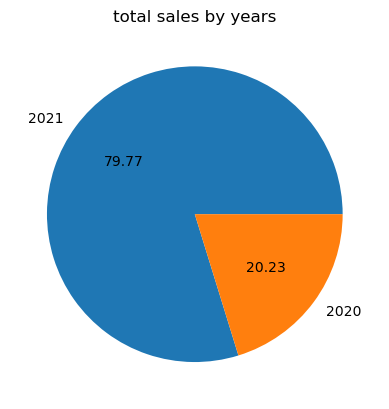

In [ ]:
plt.pie(x=year_total_sales_sorted,labels=year_index,autopct='%.2f')
plt.title('total sales by years')
plt.show()

In [ ]:
states_10 = ['New York','California','Florida','Texas','South Carolina','Washington','North Carolina','Louisiana','Hawaii','Virginia']
total_sales_10 = ['64229039','60174133','59283710','46359744','29285633','26330715','23956526','23750780','22282451','21575034']

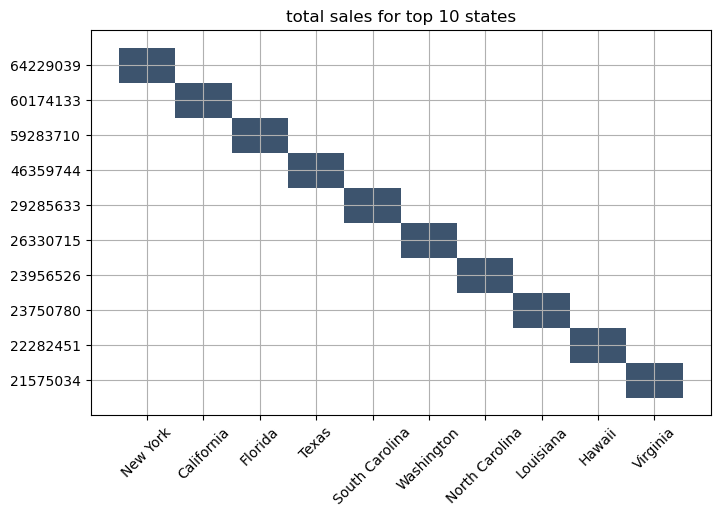

In [ ]:
plt.figure(figsize=(8,5))
plt.title('total sales for top 10 states')
sns.histplot(x=states_10,y=total_sales_10)
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [ ]:
retailer=df['Retailer'].value_counts()
retailer.index

Index(['Foot Locker', 'West Gear', 'Sports Direct', 'Kohl's', 'Amazon',
       'Walmart'],
      dtype='object', name='Retailer')

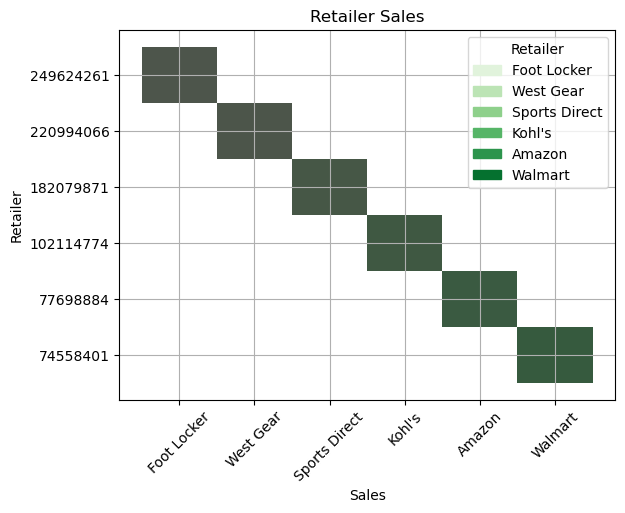

In [ ]:
sales_retailer = ['249624261', '220994066', '182079871', '102114774', '77698884', '74558401']
sns.histplot(y=sales_retailer,x=retailer.index,hue=retailer.index,palette='Greens')
plt.title("Retailer Sales")
plt.xlabel("Sales")
plt.ylabel("Retailer")
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
products = ["Men's Street Footwear","Women's Apparel","Men's Athletic Footwear","Women's Street Footwear","Men's Apparel","Women's Athletic Footwear"]
sales_products = ['208826167','179038772','153673673','128002797','123728529','106631855']

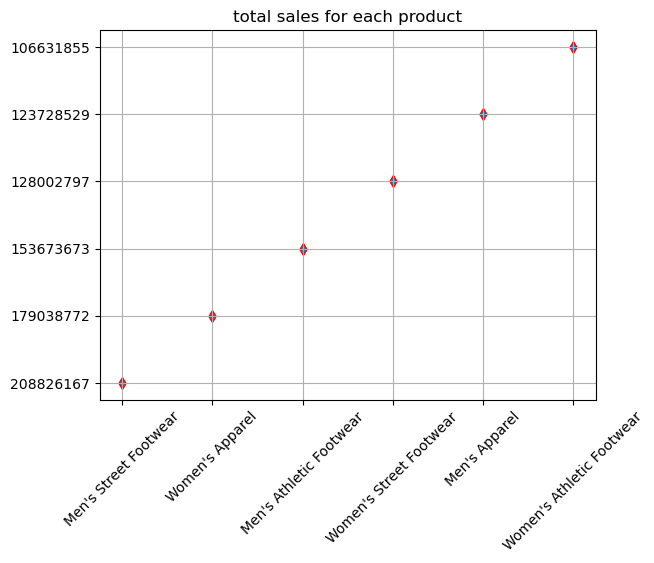

In [ ]:
plt.scatter(x=products,y = sales_products,marker='d',edgecolors='red')
plt.title('total sales for each product')
plt.grid()
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.to_csv('adiddass_uk.csv')